In [1]:
# Predicting Survival in the Titanic Data Set:
    
# We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides 
# information on the Titanic passengers and can be used to predict whether a passenger survived or not.

# Loading Data and modules
# import numpy as np
# import pandas as pd
# import seaborn as sb
# import matplotlib.pyplot as plt
# import sklearn
# from pandas import Series, DataFrame
# from pylab import rcParams
# from sklearn import preprocessing
# from sklearn.linear_model import LogisticRegression
# from sklearn.cross_validation import train_test_split
# from sklearn import metrics
# from sklearn.metrics import classification_report
# Url= https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv
# titanic = pd.read_csv(url)
# titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

# You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a 
# passenger survived.

# Load Libraries

In [2]:
# Core Libraries - Data manipulation and analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Core Libraries - Machine Learning, Preprocessing and generating Performance Metrics
import sklearn
from sklearn import preprocessing
from sklearn import metrics

# Importing Classifiers - Modelling
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

## Importing train_test_split,cross_val_score,GridSearchCV,KFold - Validation and Optimization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

# Importing Graphing and Visualization tools
import pydotplus
from IPython.display import Image


# Load Data

In [3]:
# Loading the data into the dataframe
url= 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)    

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Understand Dataset and Data

In [5]:
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
print(titanic.shape)

(891, 12)


In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


___There are null values in the dataset which need to be removed or imputed___

In [10]:
titanic.get_dtype_counts()

float64    2
int64      5
object     5
dtype: int64

# Data Cleaning

__Find rows containing null values or zeros(that don't belong in the dataset) and then either impute or remove them__

___Checking for columns containing null values___

In [11]:
titanic.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

***The question points out: You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived.***

**Therefore, removing other columns**

In [12]:
# Creating a dataframe to used in the prediction at the end
titanic_name_id = titanic[["PassengerId","Name"]]
titanic_name_id.head(), titanic_name_id.shape

(   PassengerId                                               Name
 0            1                            Braund, Mr. Owen Harris
 1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...
 2            3                             Heikkinen, Miss. Laina
 3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)
 4            5                           Allen, Mr. William Henry, (891, 2))

In [13]:
titanic_name_id.tail()

,PassengerId,Name
886,887,"Montvila, Rev. Juozas"
887,888,"Graham, Miss. Margaret Edith"
888,889,"Johnston, Miss. Catherine Helen ""Carrie"""
889,890,"Behr, Mr. Karl Howell"
890,891,"Dooley, Mr. Patrick"


In [14]:
titanic.drop(axis =1, columns= ["PassengerId","Name","Ticket","Cabin","Embarked"], inplace = True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


***All columns in the dataframe have non-null values except the Age***

In [15]:
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [16]:
# Imputing the null values in Age column with the column's mean
titanic['Age'].fillna((titanic['Age'].mean()), inplace=True)

In [17]:
# Checking if all the values have been imputed
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [18]:
titanic.shape

(891, 7)

In [19]:
# Checking for rows with all values = 0, to remove or impute
titanic.loc[(titanic==0).all(axis=1)].shape 

(0, 7)

In [20]:
# Checking for rows with any values < 0, to remove or impute
titanic.loc[(titanic<0).any(axis=1)].shape 

(891, 7)

In [21]:
# Selecting categorical columns to feature engineer
cat_cols = titanic.select_dtypes(include='object').columns.values
cat_cols

array(['Sex'], dtype=object)

In [22]:
# Encoding the Sex columns values into 0 and 1 and creating a new column with those values
titanic['Sex_Encoded'] = titanic['Sex'].replace({'female':0, 'male': 1})

In [23]:
# Dropping the Sex column
titanic.drop("Sex",axis =1, inplace = True)

In [24]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Encoded
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


***Creating Input Vector and Output***

In [25]:
X = titanic.drop("Survived", axis = 1)

In [26]:
Y = titanic.Survived

In [27]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_Encoded
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [28]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Basic Statistical information

In [29]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Encoded
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [30]:
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Encoded
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333
Sex_Encoded,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000


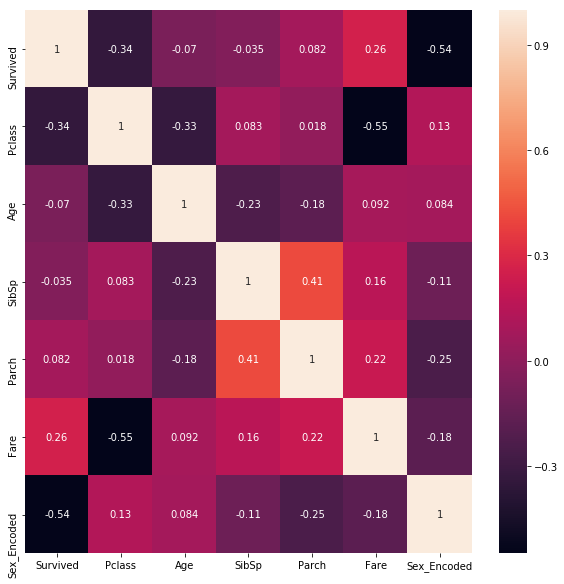

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(titanic.corr(), annot = True)

# Train Test Split

In [32]:
x_train,x_test,y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state =100)

# Fitting the models and evaluating performance metrics


In [33]:
lr =  LogisticRegression()
lr.fit(x_train, y_train)
y_test_pred= lr.predict(x_test)

In [34]:
print("Logistic Regression Classifier - Base",
      "\n\t Accuracy:", metrics.accuracy_score(y_test, y_test_pred),
      "\n\t Precision:", metrics.precision_score(y_test, y_test_pred),
      "\n\t Recall:", metrics.recall_score(y_test, y_test_pred),
      "\n\t Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_test_pred),
      "\n\t Classification Report:",  metrics.classification_report(y_test, y_test_pred),"\n")   

Logistic Regression Classifier - Base 
	 Accuracy: 0.7932960893854749 
	 Precision: 0.796875 
	 Recall: 0.68 
	 Confusion Matrix:
 [[91 13]
 [24 51]] 
	 Classification Report:              precision    recall  f1-score   support

          0       0.79      0.88      0.83       104
          1       0.80      0.68      0.73        75

avg / total       0.79      0.79      0.79       179
 



In [35]:
%%time
cart =  DecisionTreeClassifier()
cart.fit(x_train, y_train)
y_test_pred= cart.predict(x_test)

Wall time: 3 ms


In [36]:
print("Decision Tree Classifier - Base",
      "\n\t Accuracy:", metrics.accuracy_score(y_test, y_test_pred),
      "\n\t Precision:", metrics.precision_score(y_test, y_test_pred),
      "\n\t Recall:", metrics.recall_score(y_test, y_test_pred),
      "\n\t Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_test_pred),
      "\n\t Classification Report:\n",  metrics.classification_report(y_test, y_test_pred),"\n")   

Decision Tree Classifier - Base 
	 Accuracy: 0.7597765363128491 
	 Precision: 0.7162162162162162 
	 Recall: 0.7066666666666667 
	 Confusion Matrix:
 [[83 21]
 [22 53]] 
	 Classification Report:
              precision    recall  f1-score   support

          0       0.79      0.80      0.79       104
          1       0.72      0.71      0.71        75

avg / total       0.76      0.76      0.76       179
 



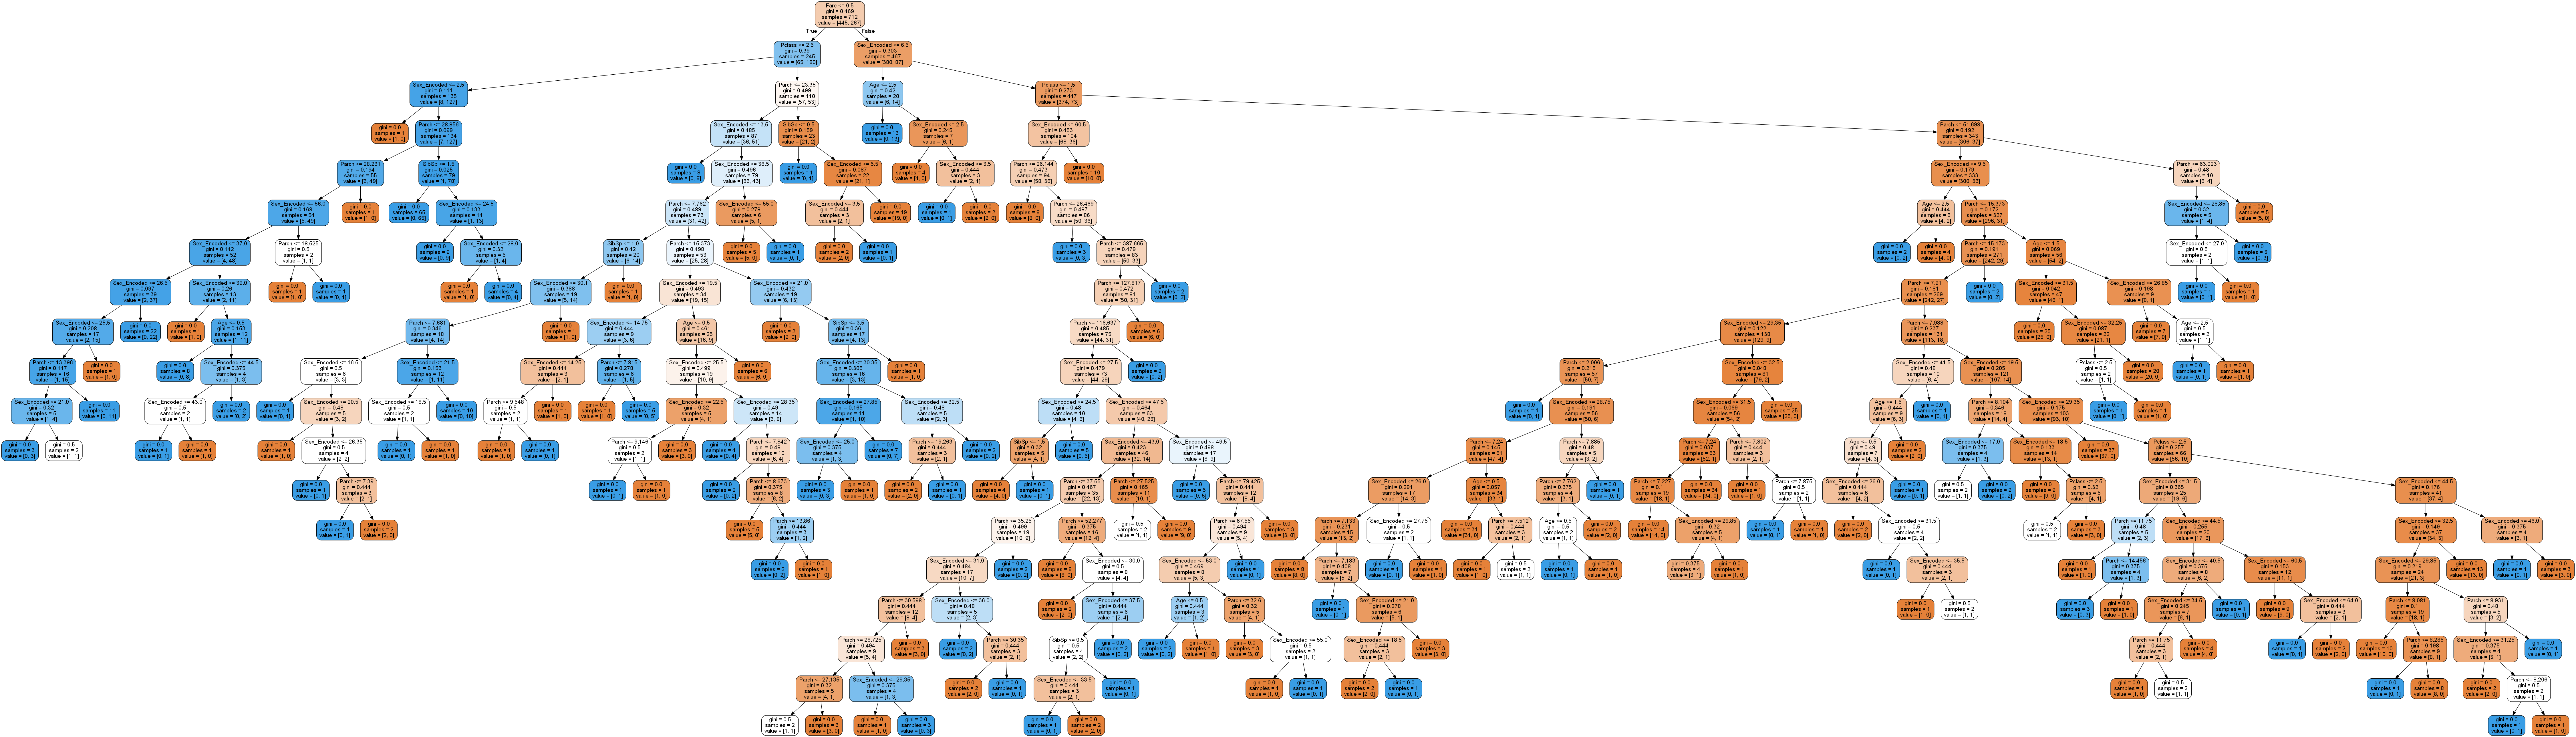

In [37]:
# Plotting graph visual of the descision tree
dot_data = tree.export_graphviz(cart, out_file=None, filled=True, rounded=True,
                                feature_names=['Pclass', 'Sex_Encoded', 'Age', 'SibSp', 'Parch', 'Fare'])
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

In [38]:
cart.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')>

# Hyper parameter Optimization

In [39]:
# Initializing the classifier to optimize, 
# Setting CV split and tree hyper-parameters for using in GridSearchCV optimization

cart_classifier =  DecisionTreeClassifier()

CV = ShuffleSplit(test_size=0.20, random_state=100)

param_grid = {  
              'criterion':['gini','entropy'], 
              'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
              'max_features':[2,3,4,5,6], 
              'max_leaf_nodes': [2, 3, 4, 6, 9],
              'min_samples_leaf':[2, 3, 5, 7],
              'min_samples_split':[2, 3, 5], 
              'random_state' : [100]
            }

In [40]:
rscv_grid = GridSearchCV(cart_classifier, param_grid=param_grid, verbose=1)

In [41]:
rscv_grid.fit(x_train, y_train) # Fitting the data using different hyper-parameters

Fitting 3 folds for each of 4800 candidates, totalling 14400 fits


[Parallel(n_jobs=1)]: Done 14400 out of 14400 | elapsed:  1.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'max_features': [2, 3, 4, 5, 6], 'max_leaf_nodes': [2, 3, 4, 6, 9], 'min_samples_leaf': [2, 3, 5, 7], 'min_samples_split': [2, 3, 5], 'random_state': [100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [42]:
# Showing the best hyper-parameters for the decision tree
rscv_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 5,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 100}

In [43]:
# Using the best estimator created from the above hyper-parameters listed in the params_grid and training it
model = rscv_grid.best_estimator_
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=5, max_leaf_nodes=9, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [44]:
y_pred_test = model.predict(x_test)

In [45]:
# Metrics of the best estimator - Decision tree classifier
print("Decision Tree Classifier - Best Estimator",
      "\n\t Accuracy:", metrics.accuracy_score(y_test, y_pred_test),
      "\n\t Precision:", metrics.precision_score(y_test, y_pred_test),
      "\n\t Recall:", metrics.recall_score(y_test, y_pred_test),
      "\n\t Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred_test),
      "\n\t Classification Report:\n",  metrics.classification_report(y_test, y_pred_test),"\n")  

Decision Tree Classifier - Best Estimator 
	 Accuracy: 0.8044692737430168 
	 Precision: 0.803030303030303 
	 Recall: 0.7066666666666667 
	 Confusion Matrix:
 [[91 13]
 [22 53]] 
	 Classification Report:
              precision    recall  f1-score   support

          0       0.81      0.88      0.84       104
          1       0.80      0.71      0.75        75

avg / total       0.80      0.80      0.80       179
 



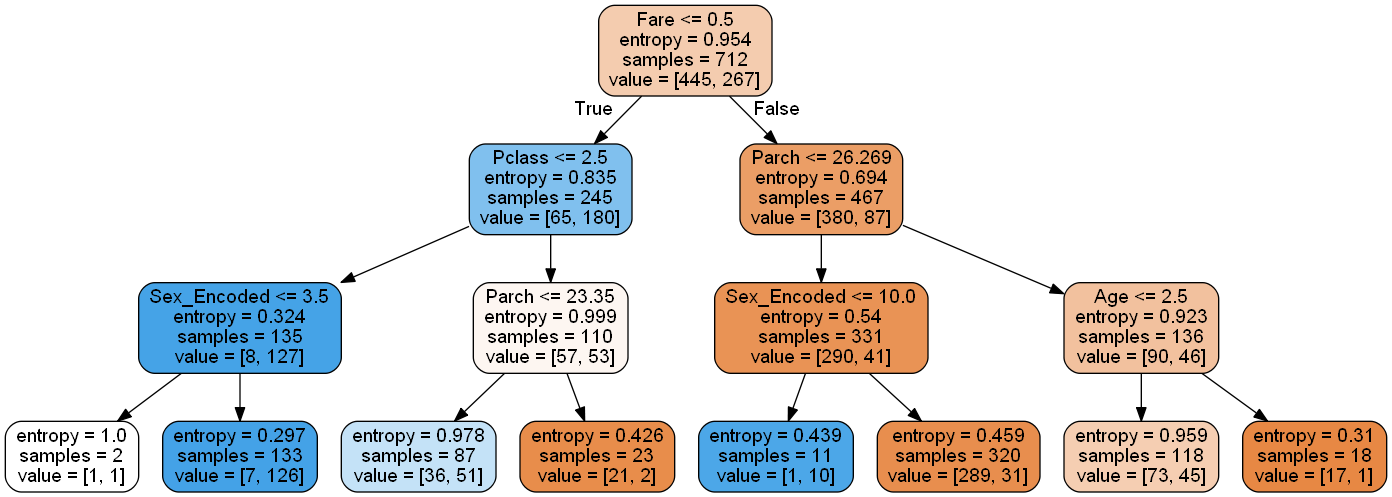

In [46]:
# Plotting graph visual of the best estimator - descision tree
dot_data = tree.export_graphviz(rscv_grid.best_estimator_, out_file=None, filled=True, rounded=True,
                                feature_names=['Pclass', 'Sex_Encoded', 'Age', 'SibSp', 'Parch', 'Fare'])
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))                 

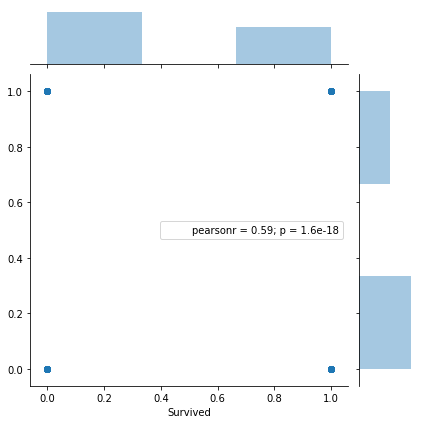

In [47]:
# Joint plot (Scatter-Frequency) of Y-test and Y-test-predicted values
sns.jointplot(y_test,y_pred_test, kind='scatter')

In [48]:
# Dataframe to show Predicted Survival and Actual Survival of Test set and compare the values
test_actual_predict = pd.DataFrame({'Actual': y_test,'Predicted': y_pred_test}, 
                  index =x_test.index)
test_actual_predict.head(10)

,Actual,Predicted
205,0,1
44,1,1
821,1,0
458,1,1
795,0,0
118,0,0
424,0,0
678,0,0
269,1,1
229,0,0


In [49]:
# Dataframe to show Predicted Survival and Actual Survival of Test set
passenger_predict_actual = pd.DataFrame({'PassengerId': titanic_name_id['PassengerId'],'Name': titanic_name_id['Name'], 'Predicted': model.predict(X), 'Actual': Y.tolist()})
passenger_predict_actual = passenger_predict_actual[['PassengerId', 'Name', 'Predicted', 'Actual']]
passenger_predict_actual

,PassengerId,Name,Predicted,Actual
0,1,"Braund, Mr. Owen Harris",0,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1
2,3,"Heikkinen, Miss. Laina",1,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1
4,5,"Allen, Mr. William Henry",0,0
5,6,"Moran, Mr. James",0,0
6,7,"McCarthy, Mr. Timothy J",0,0
7,8,"Palsson, Master. Gosta Leonard",1,0
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",1,1


In [50]:
# Metrics of the best estimator used on the cleaned titanic dataset(X- Input Vector) - Decision tree classifier
print("Decision Tree Classifier - Best Estimator used on the cleaned titanic dataset(X- Input Vector) ",
      "\n\t Accuracy:", metrics.accuracy_score(model.predict(X), Y),
      "\n\t Precision:", metrics.precision_score(model.predict(X), Y),
      "\n\t Recall:", metrics.recall_score(model.predict(X), Y),
      "\n\t Confusion Matrix:\n", metrics.confusion_matrix(model.predict(X), Y),
      "\n\t Classification Report:\n",  metrics.classification_report(model.predict(X), Y),"\n")  

Decision Tree Classifier - Best Estimator used on the cleaned titanic dataset(X- Input Vector)  
	 Accuracy: 0.8215488215488216 
	 Precision: 0.7017543859649122 
	 Recall: 0.8080808080808081 
	 Confusion Matrix:
 [[492 102]
 [ 57 240]] 
	 Classification Report:
              precision    recall  f1-score   support

          0       0.90      0.83      0.86       594
          1       0.70      0.81      0.75       297

avg / total       0.83      0.82      0.82       891
 

